In [1]:
#Fjernes
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
from torch.utils.data import Dataset
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd 


import torch.nn.functional as F

In [2]:
import cv2

In [3]:
# Fjernes
#/Users/laurabraadrasmussen/Documents/UNI/5. semester/Deep Learning/Projekt/Data
train_data = pd.read_csv('../Data/training.csv')
test_data = pd.read_csv('../Data/test.csv')
id_lookup_data = pd.read_csv('../Data/IdLookupTable.csv')

In [4]:
# Fjernes 
# Fjerner NA i dataset
train_data = train_data.dropna()
train_data_200 = train_data.sample(n = 200)

In [5]:
# Fjernes
# make data iterator for spiral dataset

class imageDataset(Dataset):
 
  def __init__(self, file_name):
    labels=[file_name.iloc[i].values[0:30] for i in range(len(train_data_200))]
    inputs=[file_name.iloc[i].values[30:31] for i in range(len(train_data_200))]
    
    inputs = [(i[0].split()) for i in inputs]
    inputs = [[int(i) for i in j] for j in inputs] 
    inputs = [np.reshape(i, (96,96)) for i in inputs]
    inputs = [np.expand_dims(i,0) for i in inputs]
    
    
    
    #print(inputs[0])
    #print(type(inputs[1]))
    self.labels=torch.tensor(labels,dtype=torch.float32) #convert to torch floats otherwise 
    self.inputs=torch.tensor(inputs, dtype=torch.float) #we will get an error message
 
  def __len__(self):
    return len(self.labels)
   
  def __getitem__(self, idx):
    return self.inputs[idx], self.labels[idx]
   

In [6]:
#Fjernes
data = imageDataset(train_data_200) 

<ipython-input-5-100a1944ddae>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:204.)
  self.labels=torch.tensor(labels,dtype=torch.float32) #convert to torch floats otherwise


In [7]:
batch_size = 32

#Convert to tensors
x_train = data.inputs
y_train = data.labels

In [8]:
input_shape = x_train[0].shape

In [9]:
#def get_image_and_keypoints(series):
#    image = series['Image']
#    image = np.fromstring(image, sep=' ').reshape([96, 96]) / 255.0
#    keypoints = pd.DataFrame(series).drop(['Image'], axis=0).values.reshape([15, 2])
#    return image, keypoints

def get_image_and_keypoints(series):
    image = series['Image']
    image = np.fromstring(image, sep=' ').reshape([96, 96]) / 255.0
    keypoints = test_outputs.reshape([15, 2])
    return image, keypoints

def get_image_and_keypoints_by_id(train_data, id):
    series = train_data.iloc[id]
    return get_image_and_keypoints(series)

def show_image_with_keypoints_by_id(train_data, id):
    series = train_data.iloc[id]
    show_image_with_keypoints(series)  

def show_image_with_keypoints(series):
    image, keypoints = get_image_and_keypoints(series)
    plt.imshow(image, cmap='gray')

In [10]:
# Prepare variables for the filter

#keypoints = y_train[0] (fra Filter.ipynb)
keypoints = test_outputs[0]

#img_copy = np.array(x_train[0]) (fra Filter.ipynb)
img_copy = np.array(test_images[0])

#img_copy = np.reshape(img_copy, (96,96,1)) (fra Filter.ipynb)

x_coords = keypoints[0::2]     
y_coords = keypoints[1::2]      

In [11]:
# Convert from grayscale to BGRA.
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_GRAY2BGRA)

# Points used for placing the filters.
left_brow_coords = (int(x_coords[7]), int(y_coords[7]))
right_brow_coords = (int(x_coords[9]), int(y_coords[9]))
nose_coords = (int(x_coords[10]), int(x_coords[10]))

In [12]:
# Apply the nose filter
nose_width = 10

nose_filter = cv2.imread('nose.png', -1)
nose_filter = cv2.resize(nose_filter, (nose_width*2,20))
sw,sh,sc = nose_filter.shape


for i in range(0,sw):
    for j in range(0,sh):
        if nose_filter[i,j][3] != 0:
            img_copy[nose_coords[0]+i-8, nose_coords[1]+j-8] = nose_filter[i,j]

In [13]:
# Apply Antlers filter on the image.
antlers_width = left_brow_coords[0] - right_brow_coords[0]

antlers_filter = cv2.imread('antlers.png', -1)
antlers_filter = cv2.resize(antlers_filter, (antlers_width,35))
gw,gh,gc = antlers_filter.shape

for i in range(0,gw):
    for j in range(0,gh):
        if antlers_filter[i,j][3] != 0:
            img_copy[left_brow_coords[1]+i-28, right_brow_coords[0]+j] = antlers_filter[i,j]

In [14]:
img_copy = img_copy.astype(np.uint8)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGRA2RGB)       # Revert back to RGB

In [15]:
def plot_sample(image):
    image = image.reshape(96,96,3)
    fig, axis = plt.subplots()
    axis.imshow(image)
    plt.imshow((image).astype(np.uint8))
    

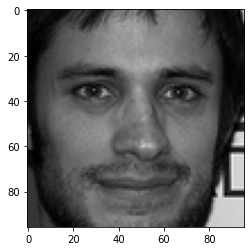

In [16]:
#show_image_with_keypoints_by_id(train_data_200, 0)
show_image_with_keypoints_by_id(image_list, 0)

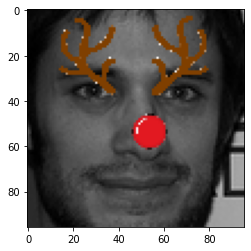

In [17]:
plot_sample(img_copy)